### Importing libraries

In [1]:
pwd

'C:\\Users\\Asus\\Downloads'

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import logging
import random
import h5py
import os
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard
from tensorflow.keras.optimizers import SGD, Adam, Nadam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from scipy import stats 

### Reading data

In [3]:
#reading data
data = h5py.File('SVHN_single_grey1.h5','r')
data.keys()

<KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>

In [4]:
#Load the training and test data
X_train = data['X_train'][:]
y_train = data['y_train'][:]
X_test = data['X_test'][:]
y_test = data['y_test'][:]

## Understanding the data

In [5]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(42000, 32, 32)
(42000,)
(18000, 32, 32)
(18000,)


##### The training dataset has 42k images of size 32*32
##### There are 42k labels that provides the correct classification for images in our training dataset
##### The test dataset has 18k images of size 32*32




### Displaying  the first 20 images of training dataset

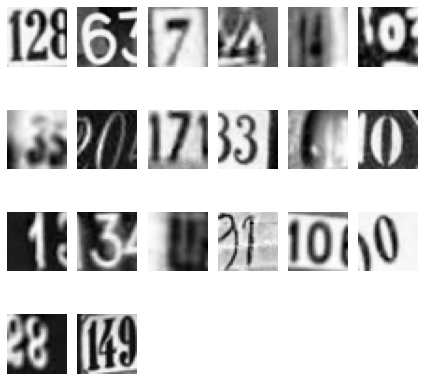

In [6]:
plt.figure(figsize=(6,6))

for index in range(20):
  plt.subplot(4,6, index+1)
  plt.imshow(X_train[index], cmap='Greys')
  plt.axis('off')

plt.tight_layout()

#### Display the labels of first 20 images of training dataset

In [7]:
y_train[0:20]

array([2, 6, 7, 4, 4, 0, 3, 0, 7, 3, 1, 0, 1, 3, 1, 1, 0, 0, 8, 4],
      dtype=uint8)

##### it can be seen that  some of the images are not clear where as some of the images have more than one digit in it. In addition to that same digit appear slightly different in different images.

## Data Pre-Processing¶

##### Steps :
###### Reshaping the data
###### Normalizing the data
###### One hot encoding of target labels.

###  Reshaping

In [8]:
X_train_reshape = X_train.reshape(X_train.shape[0], 1024).astype('float32')
X_test_reshape = X_test.reshape(X_test.shape[0], 1024).astype('float32')

In [9]:
print('X_train_reshape', X_train_reshape.shape,'X_test_reshape',X_test_reshape.shape)

X_train_reshape (42000, 1024) X_test_reshape (18000, 1024)


### Normalizing data

In [10]:
# Checking the data of the random image in the training dataset
X_train_reshape[23]

array([146.0545, 146.2825, 144.9945, ..., 139.7608, 140.2338, 142.0056],
      dtype=float32)

##### The above data shows the pixel values for first image. These values range from 0 to 255. Hence to normalize the data (we need to change the values to range between 0 and 1) we will divide each of them by 255 or can use any scaler from preprocessing to normalize or standardize or both.

In [11]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
#Normalizing the reshaped data
X_train_norm = mm.fit_transform(X_train_reshape)
X_test_norm = mm.fit_transform(X_test_reshape)

In [12]:
#Verifying that data of the same image in the training dataset
X_train_norm[23]

array([0.56578577, 0.56697655, 0.56043696, ..., 0.5428662 , 0.5425139 ,
       0.549191  ], dtype=float32)

### Standardizing the normalizing  data

In [13]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_s = sc.fit_transform(X_train_norm)
X_test_s = sc.fit_transform(X_test_norm)

### One hot encoding of labels¶
##### The output of the network needs to classify the images between 0 to 9 i.e there are 10 classes. The loss function used in our neural network will be cross entropy .

In [14]:
y_train[23]

9

In [15]:
n_classes = 10
y_train_enc = to_categorical(y_train, n_classes)
y_test_enc = to_categorical(y_test, n_classes)

In [16]:
y_train_enc[23]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

##### The above label from the training data denotes the label for digit 9

### Designing neural network architecure

#### The neural network architecture design will have the following propoerties

### Input Layer :

###### No. of neurons : 1024
###### Hidden Layer 1 :

###### No. of neurons : 200

###### Activation Function : ReLU

###### Batch Normalization : Yes

### Hidden Layer 2 :

###### No. of neurons : 100

###### Activation Function : ReLU

###### Batch Normalization : Yes

### Hidden Layer 3 :

#####  No. of neurons : 60

###### Activation Function : ReLU

###### Batch Normalization : Yes

###### Dropout : 0.3

### Hidden Layer 4 :

#####  No. of neurons : 30

###### Activation Function : ReLU

###### Batch Normalization : Yes

### Output Layer :

###### No. of neurons : 10

###### Activation Function : Softmax

### Additional properties of neural network

###### Optimizer : Adam

###### Loss Function : Cross Entropy

###### Batch Size : 32

###### Epoch : 100

In [17]:
tf.keras.backend.clear_session()

# Define a sequential model
model = Sequential()


#First Hidden Layer
model.add(Dense(200, activation='relu', input_shape=(1024,)))

#Add batch normalization
model.add(BatchNormalization())

#Second Hidden Layer
model.add(Dense(100,activation='relu'))

#Add batch normalization
model.add(BatchNormalization())

# Third Hidden Layer
model.add(Dense(60, activation='relu'))

#Add batch normalization
model.add(BatchNormalization())

# Fourth hidden layer
model.add(Dense(30,activation ='relu'))

#Add batch Normalization
model.add(BatchNormalization())


#Output layer
model.add(Dense(10, activation='softmax'))

## Model Summary¶

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 200)               205000    
_________________________________________________________________
batch_normalization (BatchNo (None, 200)               800       
_________________________________________________________________
dense_1 (Dense)              (None, 100)               20100     
_________________________________________________________________
batch_normalization_1 (Batch (None, 100)               400       
_________________________________________________________________
dense_2 (Dense)              (None, 60)                6060      
_________________________________________________________________
batch_normalization_2 (Batch (None, 60)                240       
_________________________________________________________________
dense_3 (Dense)              (None, 30)                1


## Configure the model

### Compile the model
##### The model will use adam as optimizer and cross entropy as loss function along with metrics of accuracy

In [19]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#### Define Model checkpoint

In [20]:
modelcheckpoint = ModelCheckpoint('SVHN.h5', monitor='val_accuracy', save_best_only=True, verbose=1)

#### Training the model
##### Train the model with batch size of 32  and epoch of 100. 

In [21]:
history = model.fit(X_train_s, y_train_enc, batch_size= 32, epochs=100, verbose=1, callbacks=[modelcheckpoint], validation_data=(X_test_s, y_test_enc))

Train on 42000 samples, validate on 18000 samples
Epoch 1/100
41728/42000 [============================>.] - ETA: 0s - loss: 1.5442 - accuracy: 0.4843
Epoch 00001: val_accuracy improved from -inf to 0.66328, saving model to SVHN.h5
42000/42000 [==============================] - 8s 192us/sample - loss: 1.5423 - accuracy: 0.4849 - val_loss: 1.0645 - val_accuracy: 0.6633
Epoch 2/100
41664/42000 [============================>.] - ETA: 0s - loss: 1.0913 - accuracy: 0.6521
Epoch 00002: val_accuracy improved from 0.66328 to 0.71167, saving model to SVHN.h5
42000/42000 [==============================] - 6s 151us/sample - loss: 1.0913 - accuracy: 0.6523 - val_loss: 0.9142 - val_accuracy: 0.7117
Epoch 3/100
41792/42000 [============================>.] - ETA: 0s - loss: 0.9603 - accuracy: 0.6948
Epoch 00003: val_accuracy improved from 0.71167 to 0.73350, saving model to SVHN.h5
42000/42000 [==============================] - 7s 161us/sample - loss: 0.9599 - accuracy: 0.6951 - val_loss: 0.8358 - va

Epoch 54/100
41824/42000 [============================>.] - ETA: 0s - loss: 0.3257 - accuracy: 0.8956
Epoch 00054: val_accuracy improved from 0.85322 to 0.85506, saving model to SVHN.h5
42000/42000 [==============================] - 7s 161us/sample - loss: 0.3261 - accuracy: 0.8955 - val_loss: 0.5118 - val_accuracy: 0.8551
Epoch 55/100
41984/42000 [============================>.] - ETA: 0s - loss: 0.3219 - accuracy: 0.8956
Epoch 00055: val_accuracy did not improve from 0.85506
42000/42000 [==============================] - 6s 150us/sample - loss: 0.3221 - accuracy: 0.8955 - val_loss: 0.5178 - val_accuracy: 0.8548
Epoch 56/100
41760/42000 [============================>.] - ETA: 0s - loss: 0.3172 - accuracy: 0.8955
Epoch 00056: val_accuracy did not improve from 0.85506
42000/42000 [==============================] - 7s 157us/sample - loss: 0.3182 - accuracy: 0.8953 - val_loss: 0.5442 - val_accuracy: 0.8447
Epoch 57/100
41952/42000 [============================>.] - ETA: 0s - loss: 0.3125 

Epoch 82/100
41984/42000 [============================>.] - ETA: 0s - loss: 0.2683 - accuracy: 0.9124
Epoch 00082: val_accuracy did not improve from 0.85933
42000/42000 [==============================] - 7s 158us/sample - loss: 0.2685 - accuracy: 0.9124 - val_loss: 0.5479 - val_accuracy: 0.8509
Epoch 83/100
41696/42000 [============================>.] - ETA: 0s - loss: 0.2624 - accuracy: 0.9133
Epoch 00083: val_accuracy did not improve from 0.85933
42000/42000 [==============================] - 6s 151us/sample - loss: 0.2622 - accuracy: 0.9133 - val_loss: 0.5592 - val_accuracy: 0.8513
Epoch 84/100
41952/42000 [============================>.] - ETA: 0s - loss: 0.2640 - accuracy: 0.9136
Epoch 00084: val_accuracy did not improve from 0.85933
42000/42000 [==============================] - 6s 149us/sample - loss: 0.2643 - accuracy: 0.9135 - val_loss: 0.5608 - val_accuracy: 0.8479
Epoch 85/100
41728/42000 [============================>.] - ETA: 0s - loss: 0.2586 - accuracy: 0.9147
Epoch 0008

##### Saving the model and prepraring for prediction

In [22]:
# saving the model
model.save('SVHN.h5')

In [23]:
model = tf.keras.models.load_model('SVHN.h52')

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 200)               205000    
_________________________________________________________________
batch_normalization (BatchNo (None, 200)               800       
_________________________________________________________________
dense_1 (Dense)              (None, 100)               20100     
_________________________________________________________________
batch_normalization_1 (Batch (None, 100)               400       
_________________________________________________________________
dense_2 (Dense)              (None, 60)                6060      
_________________________________________________________________
batch_normalization_2 (Batch (None, 60)                240       
_________________________________________________________________
dense_3 (Dense)              (None, 30)                1

In [25]:
model.input

<tf.Tensor 'dense_input_2:0' shape=(None, 1024) dtype=float32>

In [26]:
X_train_s[0].shape

(1024,)

In [27]:
input_data = np.expand_dims(X_test_s[0], axis=0)
input_data.shape

(1, 1024)

### Predictions

In [28]:
pred = model.predict(input_data)
pred

array([[0.4601228 , 0.07341414, 0.00331894, 0.00125566, 0.01383559,
        0.0128351 , 0.11266635, 0.00067539, 0.04079534, 0.28108072]],
      dtype=float32)

In [29]:
pred.shape

(1, 10)

In [30]:
model.predict_classes(X_test_s[1513].reshape(1,1024))

array([4], dtype=int64)

In [31]:
y_test[1513]

4

### Accuracy and Graphs

In [32]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


###### Accuracy 
##### since our model is saving the best accuracy ,printing the max value from list of accuracies will give us the values of best accuracy our model achieved on validation data

In [33]:
print ('Our model achieved the top training accuracy of',max(history.history['accuracy']))
print('Our model achieved the top testing accuracy of',max(history.history['val_accuracy']))

Our model achieved the top training accuracy of 0.9210476
Our model achieved the top testing accuracy of 0.85933334


##### Plots

##### Model Accuracy curve

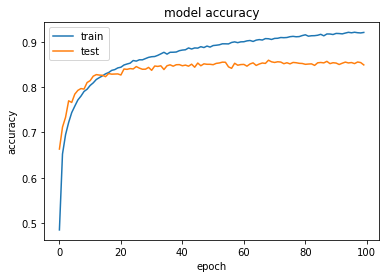

In [34]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

##### Model Loss curve

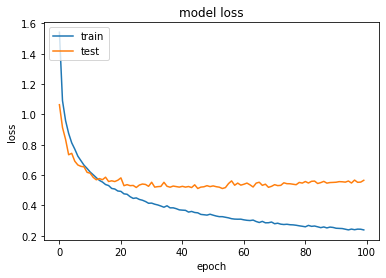

In [35]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Visualizing some predictions

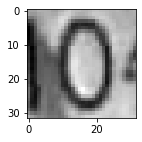

Label for the above image:  0
Predicted label for above image:  [0]


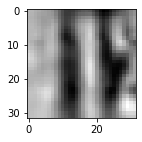

Label for the above image:  1
Predicted label for above image:  [1]


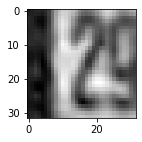

Label for the above image:  2
Predicted label for above image:  [2]


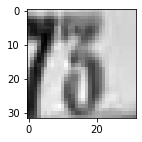

Label for the above image:  3
Predicted label for above image:  [3]


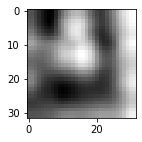

Label for the above image:  4
Predicted label for above image:  [4]


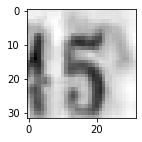

Label for the above image:  5
Predicted label for above image:  [5]


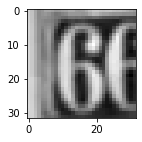

Label for the above image:  6
Predicted label for above image:  [6]


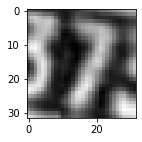

Label for the above image:  7
Predicted label for above image:  [7]


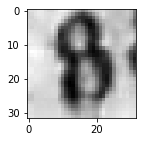

Label for the above image:  8
Predicted label for above image:  [8]


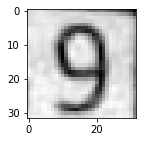

Label for the above image:  9
Predicted label for above image:  [9]


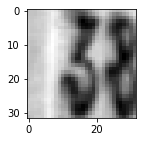

Label for the above image:  3
Predicted label for above image:  [3]


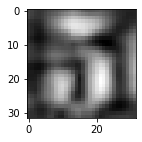

Label for the above image:  5
Predicted label for above image:  [5]


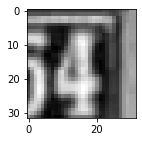

Label for the above image:  4
Predicted label for above image:  [4]


In [36]:
plt.figure(figsize=(2,2))
plt.imshow(X_test[113], cmap="gray")
plt.show()

print("Label for the above image: ", y_test[113])
print("Predicted label for above image: ", model.predict_classes(X_test_s[113].reshape(1,1024)))


plt.figure(figsize=(2,2))
plt.imshow(X_test[53], cmap="gray")
plt.show()

print("Label for the above image: ", y_test[53])
print("Predicted label for above image: ", model.predict_classes(X_test_s[53].reshape(1,1024)))



plt.figure(figsize=(2,2))
plt.imshow(X_test[7986], cmap="gray")
plt.show()

print("Label for the above image: ", y_test[7986])
print("Predicted label for above image: ", model.predict_classes(X_test_s[7986].reshape(1,1024)))


plt.figure(figsize=(2,2))
plt.imshow(X_test[905], cmap="gray")
plt.show()

print("Label for the above image: ", y_test[905])
print("Predicted label for above image: ", model.predict_classes(X_test_s[905].reshape(1,1024)))


plt.figure(figsize=(2,2))
plt.imshow(X_test[142], cmap="gray")
plt.show()

print("Label for the above image: ", y_test[142])
print("Predicted label for above image: ", model.predict_classes(X_test_s[142].reshape(1,1024)))





plt.figure(figsize=(2,2))
plt.imshow(X_test[3701], cmap="gray")
plt.show()

print("Label for the above image: ", y_test[3701])
print("Predicted label for above image: ", model.predict_classes(X_test_s[3701].reshape(1,1024)))

plt.figure(figsize=(2,2))
plt.imshow(X_test[7645], cmap="gray")
plt.show()

print("Label for the above image: ", y_test[7645])
print("Predicted label for above image: ", model.predict_classes(X_test_s[7645].reshape(1,1024)))








plt.figure(figsize=(2,2))
plt.imshow(X_test[341], cmap="gray")
plt.show()

print("Label for the above image: ", y_test[341])
print("Predicted label for above image: ", model.predict_classes(X_test_s[341].reshape(1,1024)))

plt.figure(figsize=(2,2))
plt.imshow(X_test[10], cmap="gray")
plt.show()

print("Label for the above image: ", y_test[10])
print("Predicted label for above image: ", model.predict_classes(X_test_s[10].reshape(1,1024)))




plt.figure(figsize=(2,2))
plt.imshow(X_test[119], cmap="gray")
plt.show()

print("Label for the above image: ", y_test[119])
print("Predicted label for above image: ", model.predict_classes(X_test_s[119].reshape(1,1024)))


plt.figure(figsize=(2,2))
plt.imshow(X_test[90], cmap="gray")
plt.show()

print("Label for the above image: ", y_test[90])
print("Predicted label for above image: ", model.predict_classes(X_test_s[90].reshape(1,1024)))


plt.figure(figsize=(2,2))
plt.imshow(X_test[360], cmap="gray")
plt.show()

print("Label for the above image: ", y_test[360])
print("Predicted label for above image: ", model.predict_classes(X_test_s[360].reshape(1,1024)))



plt.figure(figsize=(2,2))
plt.imshow(X_test[13], cmap="gray")
plt.show()

print("Label for the above image: ", y_test[13])
print("Predicted label for above image: ", model.predict_classes(X_test_s[13].reshape(1,1024)))

In [37]:
loss,accuracy = model.evaluate(X_train_s,y_train_enc)
loss1,accuracy1 = model.evaluate(X_test_s,y_test_enc)
print("The training loss was about {}% whereas the training accuracy accounted up to {}% but,\n the validation loss goes upto {}% & validation accuracy is {}%".format(loss*100,accuracy*100,loss1*100,accuracy1*100))

18000/18000 [==============================] - 1s 55us/sample - loss: 0.5503 - accuracy: 0.8607
The training loss was about 8.994925724360204% whereas the training accuracy accounted up to 97.51428365707397% but,
 the validation loss goes upto 55.029739311668614% & validation accuracy is 86.06666922569275%
